# CSE 7324 Lab 1: Exploring Table Data
### *Thomas Adams, Suleiman Hijazeen, Nancy Le and Andrew Whigham*
------

### 0. Setup & Dependencies
------

In [3]:
# dependencies for lab 1
import pandas as pd
import numpy as np
# use plotly in offline mode to not have active connection to plotly servers
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

### 1. Business Understanding
------

### 2. Data Understanding
------

In [16]:
# read in data to data frames
c02sec = pd.read_csv("data/global-carbon-dioxide-emissions-by-sector-gg-co.csv")
cumc02 = pd.read_csv("data/share-of-cumulative-co2.csv")
c02gdp = pd.read_csv("data/co-emissions-per-capita-vs-gdp-per-capita-international-.csv")

# merge dataframes. works like a sql inner join (i.e. non matching rows dropped)
data = c02sec.merge(cumc02, left_on=['Code', 'Year'], right_on=['Code', 'Year']).merge(c02gdp, left_on=['Code', 'Year'], right_on=['Code', 'Year'])

# remove duplicate country attributes that were created during join
data.drop(['Entity_x', 'Entity_y'], axis=1, inplace = True)
data.to_csv('data/data.csv', sep=',')
data.head()

,Code,Year,Transport,Forestry,Energy,Other sources,"Agriculture, Land Use & Forestry",Waste,Residential & commercial,Industry,Agriculture,Share of global cumulative CO₂ emissions (%),Entity,Per capita CO₂ emissions (tonnes per capita),GDP per capita (2011 int-$) ($),Total population (Gapminder)
0,AFG,1990,607.2770,0.0,277.4122,0,0.0,0.0,918.4148,118.8101,0.0,0.007,Afghanistan,0.213,1992.0,13032161.0
1,AFG,1991,531.4588,0.0,270.1278,0,0.0,0.0,690.8751,129.7491,0.0,0.007,Afghanistan,0.188,1761.0,14069854.0
2,AFG,1992,376.1294,0.0,154.5804,0,0.0,0.0,373.4546,141.6256,0.0,0.007,Afghanistan,0.099,1629.0,15472076.0
3,AFG,1993,323.7141,0.0,151.7126,0,0.0,0.0,325.8062,124.7280,0.0,0.007,Afghanistan,0.089,1080.0,17053213.0
4,AFG,1994,310.3998,0.0,146.3426,0,0.0,0.0,265.0813,147.0716,0.0,0.007,Afghanistan,0.080,772.0,18553819.0


Attribute | Description | Type
--- | --- | ---
Entity | Country Name | Ordinal

### 3. Data Visualization
------

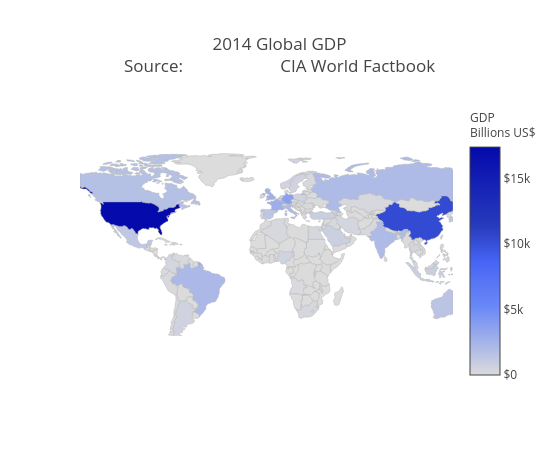

In [15]:
df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/2014_world_gdp_with_codes.csv')

data = [ dict(
       type = 'choropleth',
       locations = df['CODE'],
       z = df['GDP (BILLIONS)'],
       text = df['COUNTRY'],
       colorscale = [[0,"rgb(5, 10, 172)"],[0.35,"rgb(40, 60, 190)"],[0.5,"rgb(70, 100, 245)"],\
           [0.6,"rgb(90, 120, 245)"],[0.7,"rgb(106, 137, 247)"],[1,"rgb(220, 220, 220)"]],
       autocolorscale = False,
       reversescale = True,
       marker = dict(
           line = dict (
               color = 'rgb(180,180,180)',
               width = 0.5
           ) ),
       colorbar = dict(
           autotick = False,
           tickprefix = '$',
           title = 'GDP<br>Billions US$'),
     ) ]

layout = dict(
   title = '2014 Global GDP<br>Source:\
           <a href="https://www.cia.gov/library/publications/the-world-factbook/fields/2195.html">\
           CIA World Factbook</a>',
   geo = dict(
       showframe = False,
       showcoastlines = False,
       projection = dict(
           type = 'Mercator'
       )
   )
)

fig = dict( data=data, layout=layout )
iplot( fig, validate=False, filename='d3-world-map' )

### 5. Additional Analysis
------
# TODO t-SNE analysis